In [87]:
# To classify potata leaf based on CNN 

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [94]:
Image_Size = 256
Batch_Size =32
Channel=3
Epochs= 10

In [90]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size= (Image_Size,Image_Size),
    batch_size= Batch_Size
)

Found 2152 files belonging to 3 classes.


In [91]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [92]:
len(dataset)

68

##  =68 *32=2176 images

In [ ]:
for images_batch,label_batch in dataset.take(1):
    print(images_batch.shape)
    print(label_batch.numpy())

In [ ]:
plt.figure(figsize=(10,10))
for images_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(images_batch[1].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [ ]:
len(dataset)

##  80% as training data, 10% as validation, 10% test

In [ ]:
train_size=0.8
len(dataset)*train_size


In [ ]:
# Take first 54 batch of data which is 80% of total
train_ds=dataset.take(54)
len(train_ds)

In [ ]:
test_ds = dataset.skip(54)  # remaining 20% of data
len(test_ds)

In [ ]:
val_size=0.1
len(dataset)*val_size

In [ ]:
val_ds =test_ds.take(6)
len(val_ds)

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

In [ ]:
# Function call to split data into trian,test, val

def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size,seed=12)
    
    train_size= int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

In [ ]:
len(val_ds)

In [ ]:
len(test_ds)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE )
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE )
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE )

In [ ]:
# Rescale & Resize
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/ 255.0)

])

In [ ]:
# Data Augumentation

data_augumentation= tf.keras.Sequential([ 
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)])

In [ ]:
# Model Architecture
input_shape = (Batch_Size,Image_Size,Image_Size,Channel)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape= (Image_Size,Image_Size)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])

In [ ]:
model.build(input_shape = input_shape)

In [ ]:
model.summary()

In [81]:
model.compile(
     optimizer='adam',
     loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics= ['accuracy'])

In [95]:
history = model.fit(train_ds,epochs=Epochs,
         batch_size=Batch_Size,
         verbose= 1,
         validation_data= val_ds)

Epoch 1/10
54/54 [==============================] - 330s 6s/step - loss: 0.7815 - accuracy: 0.6273 - val_loss: 0.6952 - val_accuracy: 0.7448
Epoch 2/10
54/54 [==============================] - 100s 2s/step - loss: 0.4750 - accuracy: 0.8187 - val_loss: 0.3765 - val_accuracy: 0.8438
Epoch 3/10
54/54 [==============================] - 101s 2s/step - loss: 0.3602 - accuracy: 0.8545 - val_loss: 0.2506 - val_accuracy: 0.9115
Epoch 4/10
54/54 [==============================] - 101s 2s/step - loss: 0.2111 - accuracy: 0.9219 - val_loss: 0.1264 - val_accuracy: 0.9583
Epoch 5/10
54/54 [==============================] - 94s 2s/step - loss: 0.1339 - accuracy: 0.9519 - val_loss: 0.1388 - val_accuracy: 0.9427
Epoch 6/10
54/54 [==============================] - 104s 2s/step - loss: 0.1041 - accuracy: 0.9654 - val_loss: 0.0643 - val_accuracy: 0.9844
Epoch 7/10
54/54 [==============================] - 106s 2s/step - loss: 0.1514 - accuracy: 0.9460 - val_loss: 0.4375 - val_accuracy: 0.8333
Epoch 8/10
54/

In [96]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 3s 383ms/step - loss: 0.2043 - accuracy: 0.9023


In [97]:
scores

[0.2042662352323532, 0.90234375]

In [98]:
history

In [99]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [100]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [101]:
# no.of epochs
len(history.history['accuracy'])

10

In [103]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

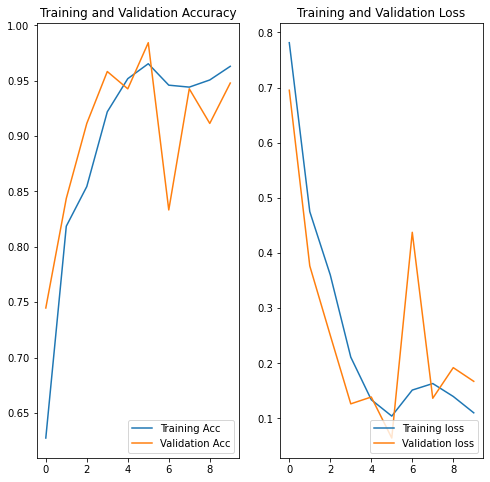

In [106]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Training Acc')
plt.plot(range(Epochs),val_acc,label='Validation Acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='Training loss')
plt.plot(range(Epochs),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

First image to Predict
First image Actual label Potato___Early_blight
Predicted Lable Potato___Late_blight


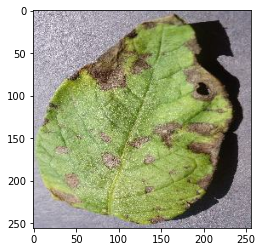

In [126]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
    first_image= images_batch[3].numpy().astype('uint8')
    first_label= label_batch[3].numpy()
    
    print("First image to Predict")
    plt.imshow(first_image)
    print("First image Actual label",class_names[first_label])
    
    batch_prediction= model.predict(images_batch)
    print('Predicted Lable', class_names[np.argmax(batch_prediction[0])])

In [127]:
# Function to predict image, Confidence

def predict(model, img):
    img_arry= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arry= tf.expand_dims(img_arry,0)  # Create a batch
    
    predictions= model.predict(img_arry)
    
    predicted_class= class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])),2)
    return predicted_class, confidence
    


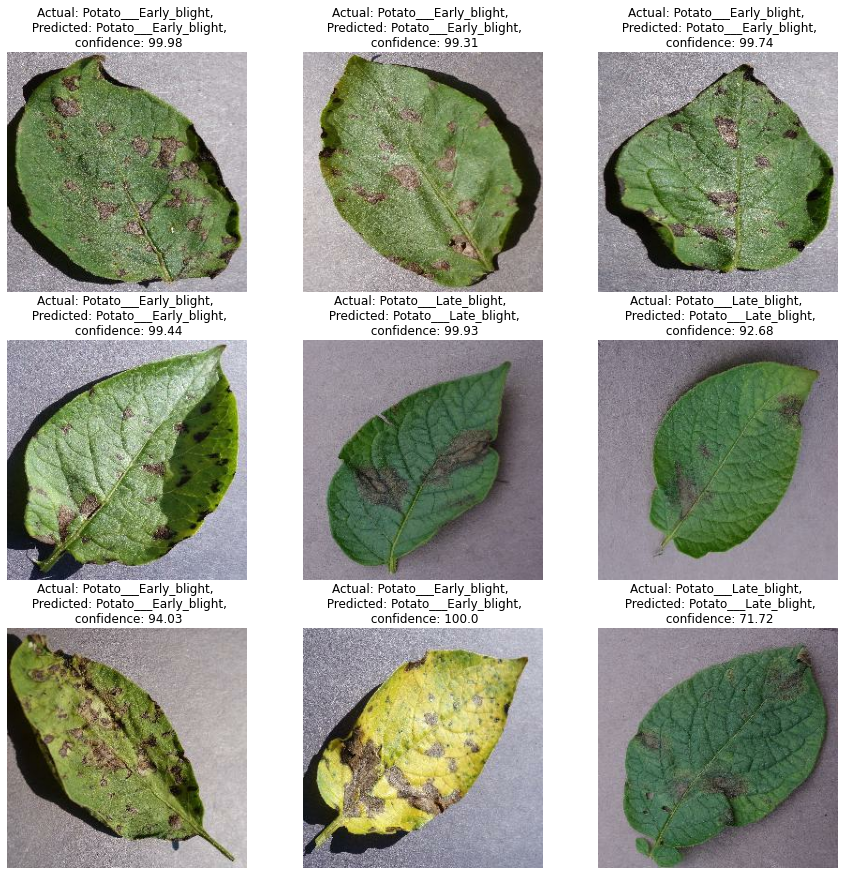

In [135]:
plt.figure(figsize=(15,15))
for images,lables in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        
        predicted_class,confidence= predict(model,images[i].numpy())
        actual_class = class_names[lables[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class},\n confidence: {confidence}")
        
        plt.axis("off")

In [143]:
import os
max([ int(i) for i in os.listdir("../model")+[0]])+1

3

In [144]:
# Model Save based on versions

model_version=3
model.save(f"../model/{model_version}")


INFO:tensorflow:Assets written to: ../model/3\assets


In [145]:
# To create model version automatically by version num +1

import os
model_version=max([ int(i) for i in os.listdir("../model")+[0]])+1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/4\assets
